# SyriaTel Customer Churn Prediction

## 1. Business Understanding
## 2. Data Understanding
## 3. Data Preparation
## 4. Modeling
## 5. Evaluation
## 6. Final Model and Interpretation
## 7. Recommendations


  
  ## 1. Business Understanding

**Business Problem:**
SyriaTel, a telecommunications company, is experiencing customer churn, which results in revenue loss. The goal of this project is to build a machine learning model to predict which customers are at risk of churning.

**Stakeholder:**
The business team at SyriaTel, particularly the customer retention and marketing departments.

**Objective:**
Use customer data to build a classifier that predicts churn, helping SyriaTel proactively retain customers at risk.

**Success Criteria:**
- High recall on churners: Better at catching those likely to leave.
- Balance with precision to avoid unnecessary retention efforts.
- Actionable recommendations based on model insights.


    

## 2. Data Understanding
**importing libraries and loading data**

In [1]:
# Standard Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, precision_recall_curve, precision_score, recall_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,make_scorer,roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load the data
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')  # loading the csv file
df.head(10)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [2]:
import os
os.listdir()


['.git',
 '.gitignore',
 'bigml_59c28831336c6604c800002a.csv',
 'cleaned_churn_data.csv',
 'customer_churn_modeling_phase3.ipynb',
 'README.md']

In [3]:
df.shape

(3333, 21)

In [4]:
df.info()
df.describe()
df['churn'].value_counts()  # Target distribution


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

churn
False    2850
True      483
Name: count, dtype: int64

In [5]:
print(df.columns.tolist())


['state', 'account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']


In [6]:
# Convert categorical variables to category type
categorical_cols = ['state', 'area code', 'phone number', 'international plan', 'voice mail plan', 'churn']

for col in categorical_cols:
    df[col] = df[col].astype('category')

categorical_cols


['state',
 'area code',
 'phone number',
 'international plan',
 'voice mail plan',
 'churn']

In [7]:
# Handle outliers using IQR
numeric_cols = ['account length', 'number vmail messages', 
                'total day minutes', 'total day calls', 'total day charge',
                'total eve minutes', 'total eve calls', 'total eve charge',
                'total night minutes', 'total night calls', 'total night charge',
                'total intl minutes', 'total intl calls', 'total intl charge',
                'customer service calls']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

numeric_cols


['account length',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls']

In [8]:
# One-hot encode categorical variables (excluding 'churn' as it's the target)
categorical_cols_to_encode = ['state', 'area code', 'phone number', 'international plan', 'voice mail plan']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True)

# Ensure churn is numeric (if it's not already)
df_encoded['churn'] = df_encoded['churn'].astype(int)

# Preview the transformed data
print(df_encoded.head())       # View the first few rows
print(df_encoded.columns)      # Check the column names


   account length  number vmail messages  total day minutes  total day calls  \
0           128.0                     25              265.1            110.0   
1           107.0                     26              161.6            123.0   
2           137.0                      0              243.4            114.0   
3            84.0                      0              299.4             71.0   
4            75.0                      0              166.7            113.0   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07             197.40             99.0             16.78   
1             27.47             195.50            103.0             16.62   
2             41.38             121.20            110.0             10.30   
3             50.90              63.55             88.0              5.40   
4             28.34             148.30            122.0             12.61   

   total night minutes  total night calls  ...  phone nu

In [9]:
# Assuming df_encoded is the DataFrame after one-hot encoding

# Separate numerical and binary/categorical columns
numerical_cols = ['account length', 'number vmail messages', 
                  'total day minutes', 'total day calls', 'total day charge',
                  'total eve minutes', 'total eve calls', 'total eve charge',
                  'total night minutes', 'total night calls', 'total night charge',
                  'total intl minutes', 'total intl calls', 'total intl charge',
                  'customer service calls']

# Binary/categorical columns = all other columns except numerical and target ('churn')
binary_cols = [col for col in df_encoded.columns if col not in numerical_cols and col != 'churn']

print("Numerical columns:")
print(numerical_cols)

print("\nBinary/Categorical columns:")
print(binary_cols)


Numerical columns:
['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

Binary/Categorical columns:
['state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY', 'area code_415', 'area code_510'

In [10]:
# Summary Statistics for Numerical Columns
print("Summary Statistics for Numerical Columns:")
numerical_summary = df_encoded[numerical_cols].describe()
print(numerical_summary)

Summary Statistics for Numerical Columns:
       account length  number vmail messages  total day minutes  \
count     3333.000000            3333.000000        3333.000000   
mean       101.003300               8.098710         179.816157   
std         39.644112              13.687436          54.152190   
min          1.000000               0.000000          34.650000   
25%         74.000000               0.000000         143.700000   
50%        101.000000               0.000000         179.400000   
75%        127.000000              20.000000         216.400000   
max        206.500000              50.000000         325.450000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.473597         30.569292         201.009541       100.134113   
std          19.863740          9.205865          50.401365        19.758567   
min          46.500000          5.

In [11]:
#Summary Statistics for Binary (One-Hot Encoded) Columns
print("\nSummary Statistics for Binary Columns (Proportion of 1s):")
binary_summary = df_encoded[binary_cols].mean().sort_values(ascending=False)
print(binary_summary)


Summary Statistics for Binary Columns (Proportion of 1s):
area code_415             0.496550
voice mail plan_yes       0.276628
area code_510             0.252025
international plan_yes    0.096910
state_WV                  0.031803
                            ...   
phone number_422-2571     0.000300
phone number_422-3052     0.000300
phone number_327-1319     0.000300
phone number_327-3053     0.000300
phone number_409-5749     0.000300
Length: 3386, dtype: float64


#### Key Observations

49.65% of customers in your dataset have area code 415.

About 27.66% of users have a voicemail plan.

About 9.69% of users are on an international plan.

About 3.18% of customers are from West Virginia.

phone number_422-2571 = 0.0003(Only one customer (0.03%) in the dataset has this exact phone number.)

#### Insights:
Skewed binary features:

Features like international plan_yes are heavily imbalanced (fewer users have them), which can affect model learning—models may learn to treat them as rare "signals."

Sparse dummy columns:

Many one-hot encoded phone numbers appear only once (~0.0003 = 1/3333). This is not useful for modeling—phone numbers are unique identifiers and should ideally be dropped.

Multicollinearity:

For area code and state, one-hot encoding has created many binary columns, potentially introducing redundant information. This can affect some algorithms like logistic regression.

In [12]:
# Summary Statistics for Target Variable (churn)
print("\nSummary Statistics for Target Variable (churn):")
df_encoded['churn'].value_counts(normalize=True)




Summary Statistics for Target Variable (churn):


churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64

0 → Customer did not churn

1 → Customer churned

In [13]:
# Save the cleaned and encoded dataset to CSV
df_encoded.to_csv("cleaned_churn_data.csv", index=False)
print("Cleaned data saved to 'cleaned_churn_data.csv'")


Cleaned data saved to 'cleaned_churn_data.csv'


## 2. Exploratory Data Analysis(EDA)

In [14]:
# Load the cleaned dataset
df_encoded = pd.read_csv("cleaned_churn_data.csv")

# Display the first few rows
df_encoded.head()


,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,phone number_422-5874,phone number_422-6685,phone number_422-6690,phone number_422-7728,phone number_422-8268,phone number_422-8333,phone number_422-8344,phone number_422-9964,international plan_yes,voice mail plan_yes
0,128.0,25,265.1,110.0,45.07,197.40,99.0,16.78,244.7,91,...,False,False,False,False,False,False,False,False,False,True
1,107.0,26,161.6,123.0,27.47,195.50,103.0,16.62,254.4,103,...,False,False,False,False,False,False,False,False,False,True
2,137.0,0,243.4,114.0,41.38,121.20,110.0,10.30,162.6,104,...,False,False,False,False,False,False,False,False,False,False
3,84.0,0,299.4,71.0,50.90,63.55,88.0,5.40,196.9,89,...,False,False,False,False,False,False,False,False,True,False
4,75.0,0,166.7,113.0,28.34,148.30,122.0,12.61,186.9,121,...,False,False,False,False,False,False,False,False,True,False


In [15]:
# Summary statistics
print("EDA Summary Statistics:")
df_encoded.describe(include='all')

EDA Summary Statistics:


,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,phone number_422-5874,phone number_422-6685,phone number_422-6690,phone number_422-7728,phone number_422-8268,phone number_422-8333,phone number_422-8344,phone number_422-9964,international plan_yes,voice mail plan_yes
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333,3333,3333,3333,3333,3333,3333,3333,3333,3333
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3332,3332,3332,3332,3332,3332,3332,3332,3010,2411
mean,101.003300,8.098710,179.816157,100.473597,30.569292,201.009541,100.134113,17.086016,200.828143,100.098410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,39.644112,13.687436,54.152190,19.863740,9.205865,50.401365,19.758567,4.284135,50.118622,19.443717,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,0.000000,34.650000,46.500000,5.890000,63.550000,46.500000,5.400000,64.550000,48.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


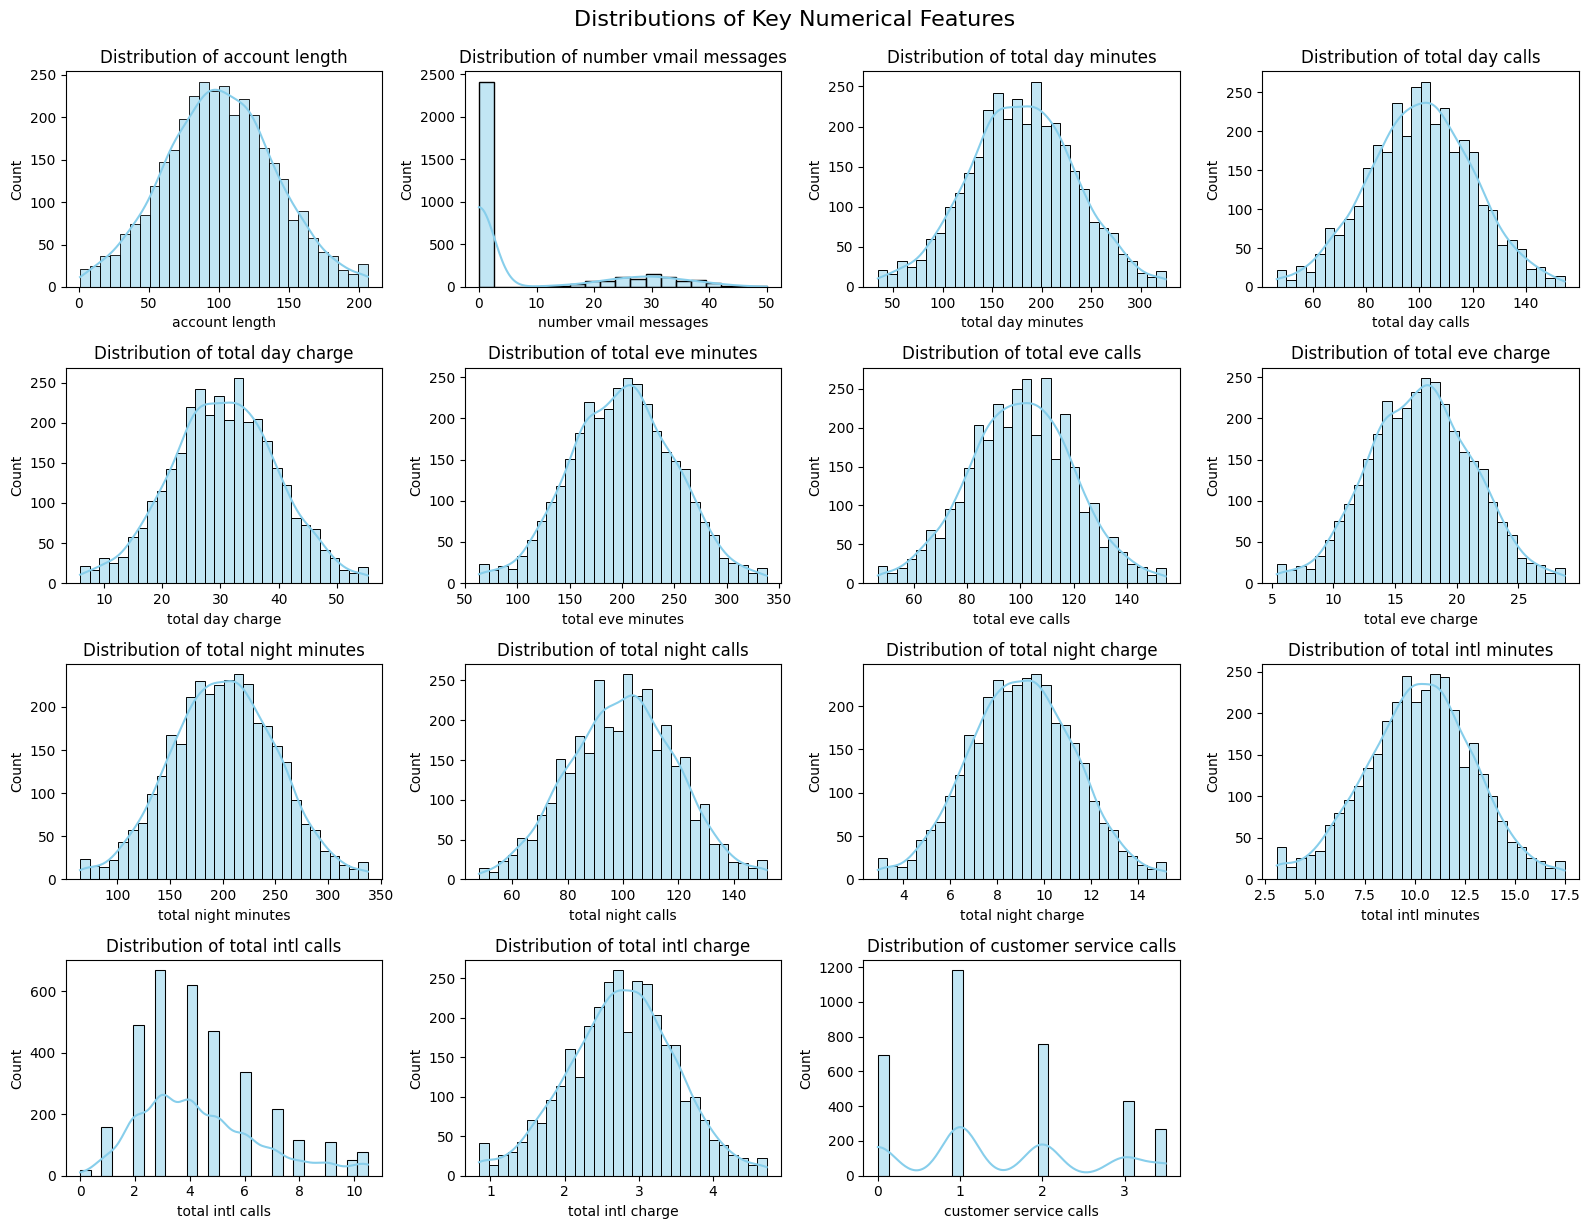

In [16]:
# Plot distributions of numerical features
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df_encoded[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
   # plt.xlabel("")
    plt.tight_layout()

plt.suptitle("Distributions of Key Numerical Features", fontsize=16, y=1.02)
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_13532\3839123997.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df_encoded, palette='Set2')


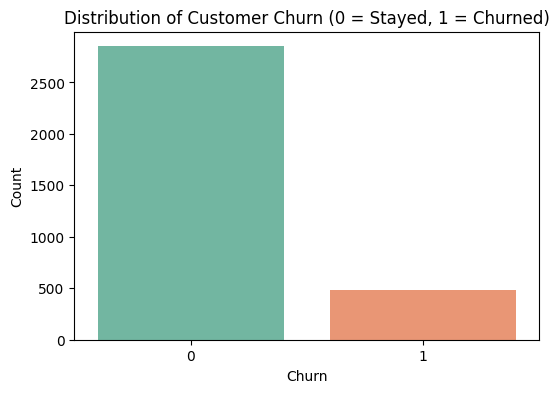

In [17]:
# Visualize Distribution of Churn Status
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df_encoded, palette='Set2')
plt.title('Distribution of Customer Churn (0 = Stayed, 1 = Churned)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


This indicates that a substantial majority of customers did not churn, highlighting a potential class imbalance that could impact predictive modeling efforts for churn prediction.

C:\Users\USER\AppData\Local\Temp\ipykernel_13532\874782744.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_encoded, x='churn', y='total day minutes', palette='coolwarm')


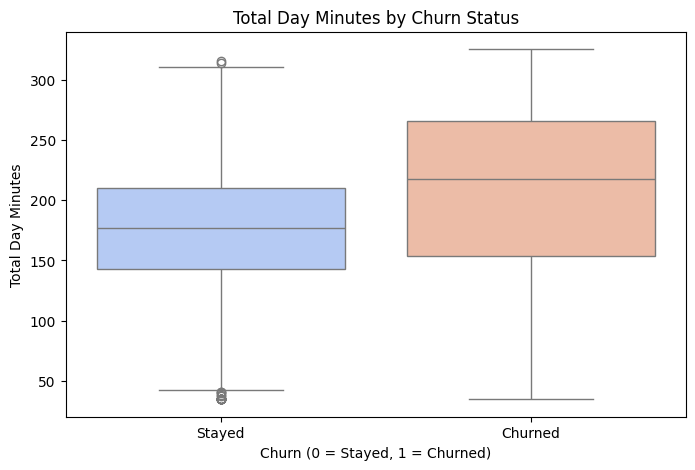

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_encoded, x='churn', y='total day minutes', palette='coolwarm')
plt.title('Total Day Minutes by Churn Status')
plt.xlabel('Churn (0 = Stayed, 1 = Churned)')
plt.ylabel('Total Day Minutes')
plt.xticks(ticks=[0, 1], labels=['Stayed', 'Churned'])
plt.show()


Correlation between total day minutes and customer service calls: -0.01


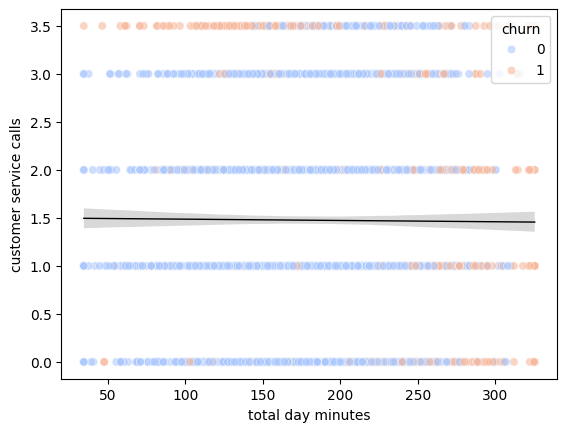

In [19]:
# Scatter plot of total day minutes vs customer service calls, colored by churn
sns.scatterplot(data=df_encoded, x='total day minutes', y='customer service calls',
                hue='churn', palette='coolwarm', alpha=0.6)

# Regression line
sns.regplot(data=df_encoded, x='total day minutes', y='customer service calls',
            scatter=False, color='black', line_kws={'linewidth': 1})

# Compute correlation
correlation = df_encoded['total day minutes'].corr(df_encoded['customer service calls'])
print(f'Correlation between total day minutes and customer service calls: {correlation:.2f}')


The scatter plot shows the relationship between total day minutes and customer service calls, with points colored by churn status. The regression line represents the overall linear trend between the two variables. In this case, the regression line appears flat (with a zero or near-zero gradient), indicating no significant linear relationship between the amount of time customers spend on daytime calls and the number of times they contact customer service. The near-zero correlation further confirms this lack of association, suggesting that daytime call duration alone is not a strong predictor of customer service interactions — and by extension, may have limited predictive power for churn in this context.

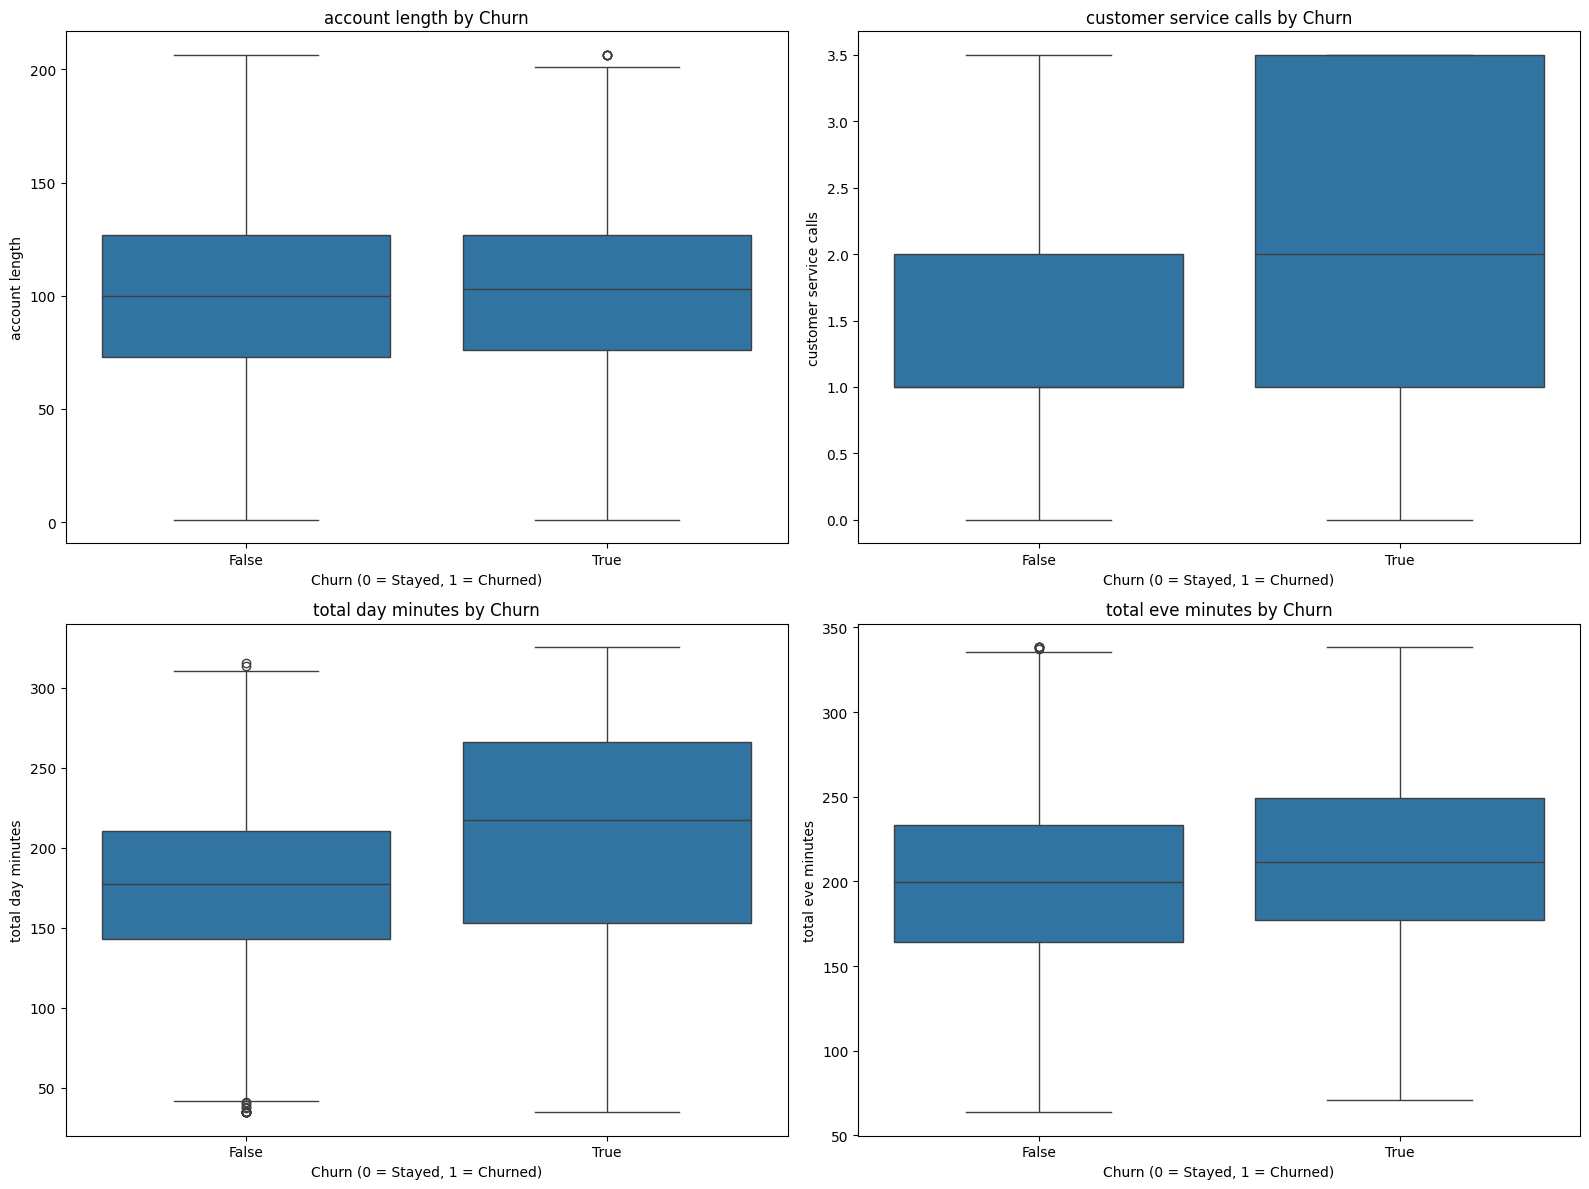

In [20]:
# Boxplots to compare distributions of key numerical features across churn status.
# This helps visualize which variables differ significantly between churned and non-churned customers.
# Features like customer service calls and account length may show stronger separation,
# indicating their potential usefulness in predicting churn.
num_vars = ['account length', 'customer service calls', 'total day minutes', 'total eve minutes']
plt.figure(figsize=(16, 12))

for i, var in enumerate(num_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='churn', y=var, data=df)
    plt.title(f'{var} by Churn')
    plt.xlabel('Churn (0 = Stayed, 1 = Churned)')
    plt.ylabel(var)

plt.tight_layout()
plt.show()


These boxplots shows a higher customer service calls may indicate user frustration, potentially leading to increased churn. Similarly, unusual total day minute usage—either very high or low—could reflect atypical behavior linked to churn. Shorter account lengths may signal weaker customer loyalty, increasing churn risk. Evening minutes may reveal usage habits that correlate with churn.

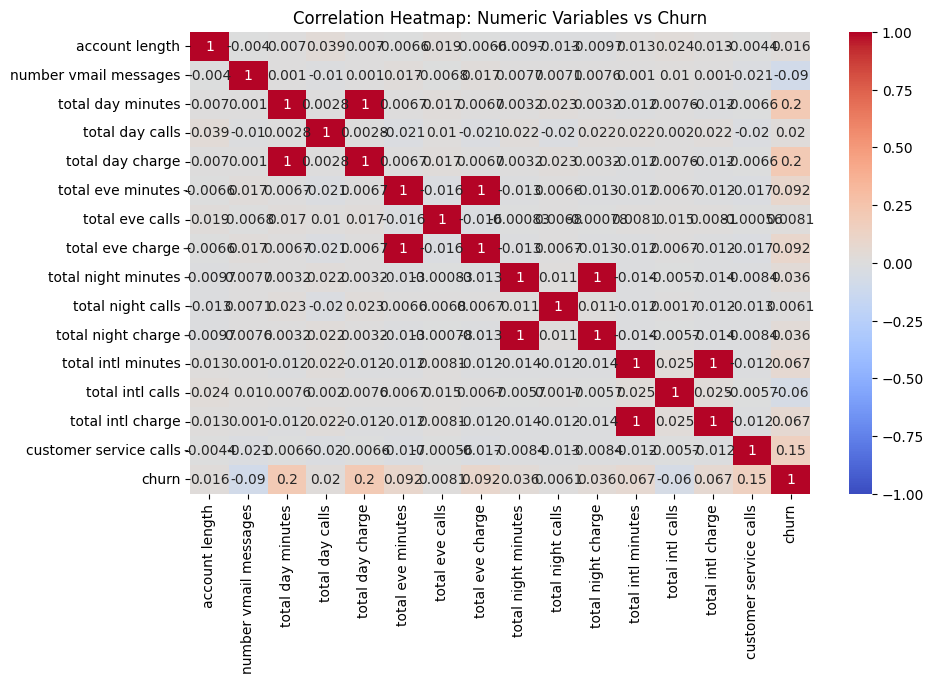

In [21]:
# Correlation heatmap for churn dataset
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded[numerical_cols + ['churn']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Numeric Variables vs Churn')
plt.show()


summary based on the correlation heatmap output reflecting churn-related variables:

total_day_minutes and churn: Slight positive correlation — customers with higher daytime call minutes are marginally more likely to churn.

customer_service_calls and churn: Strong positive correlation — customers who call support more frequently are more likely to churn, suggesting dissatisfaction.

account_length and churn: Weak or no correlation — indicating that how long a customer has stayed may not strongly influence churn.

total_eve_minutes and churn: Weak correlation — evening call usage appears to have minimal influence on churn behavior.

Most other variables show weak correlations with churn, suggesting they may not significantly impact the churn decision on their own.

Summary: Customer service calls stand out as a strong churn indicator. Usage features like total_day_minutes show slight influence, while account length and evening usage have minimal effect.

In [22]:
# Insight: Check correlation between customer service calls and churn
correlation = df_encoded['customer service calls'].corr(df_encoded['churn'])
print(f"\nInsight: There is a correlation of {correlation:.2f} between customer_service_calls and churn, suggesting that more frequent calls to customer service may be associated with a higher likelihood of churn.")



Insight: There is a correlation of 0.15 between customer_service_calls and churn, suggesting that more frequent calls to customer service may be associated with a higher likelihood of churn.


In [23]:
print(df_encoded.columns.tolist())


['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn', 'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY', 'area code_415', 'area code_510', 'phone number_327-1319', 'phone number

## 3.Modelling

In [24]:
# Define features (X) and target (y)
X = df_encoded.drop('churn', axis=1)
y = df_encoded['churn'].astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Class imbalance
print(y_train.value_counts())

churn
0    2284
1     382
Name: count, dtype: int64


In [28]:
!pip uninstall -y scikit-learn imbalanced-learn


In [29]:
!pip install scikit-learn==1.3.2 imbalanced-learn==0.11.0


Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit-learn-1.3.2.tar.gz (7.5 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [45 lines of output]
      Partial import of sklearn during the build process.
      Traceback (most recent call last):
        File "C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 389, in <module>
          main()
          ~~~~^^
        File "C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 373, in main
          json_out["return_val"] = hook(**hook_input["kwargs"])
                                   ~~~~^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 175, in prepare_metadata_for_build_wheel
          return hook(metadata_directory, config_settings)
        File "C:\Users\USER\AppData\Local\Temp\

In [30]:
!pip install --only-binary :all: scikit-learn==1.3.2 imbalanced-learn==0.11.0


Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement scikit-learn==1.3.2 (from versions: 1.5.2, 1.6.0rc1, 1.6.0, 1.6.1, 1.7.0rc1, 1.7.0, 1.7.1)
ERROR: No matching distribution found for scikit-learn==1.3.2


In [31]:
!python -m ipykernel install --user --name=ds-env --display-name "Python 3.10 (ds-env)"


Installed kernelspec ds-env in C:\Users\USER\AppData\Roaming\jupyter\kernels\ds-env


In [37]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE to balance the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE on the training set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print(y_train_resampled.value_counts())


churn
0    2284
1    2284
Name: count, dtype: int64


In [33]:
!where python


c:\Program Files\Python313\python.exe


In [34]:
%pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached scikit_learn-1.7.1-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl (11.1 MB)

   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-le

In [75]:
%pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [38]:
# Initialize and train model on SMOTE-resampled data
model = LogisticRegression(max_iter=500)
model.fit(X_train_resampled, y_train_resampled)

# Perform cross-validation on resampled data
cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

# Make predictions on original (non-resampled) test set
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Evaluate accuracy
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

# Print results
print(f"Train Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")
print(f"Mean CV Accuracy: {cv_scores.mean():.3f}")
print(f"Standard Deviation of CV: {cv_scores.std():.3f}")


C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Train Accuracy: 0.833
Test Accuracy: 0.799
Mean CV Accuracy: 0.870
Standard Deviation of CV: 0.090


In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, test_pred))


              precision    recall  f1-score   support

           0       0.88      0.89      0.88       566
           1       0.33      0.31      0.32       101

    accuracy                           0.80       667
   macro avg       0.60      0.60      0.60       667
weighted avg       0.79      0.80      0.80       667



### Train the Logistic Regression Model

In [41]:
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Accuracy: 0.6701649175412294
Precision: 0.26848249027237353
Recall: 0.6831683168316832
F1-Score: 0.3854748603351955


C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[502  64]
 [ 70  31]]


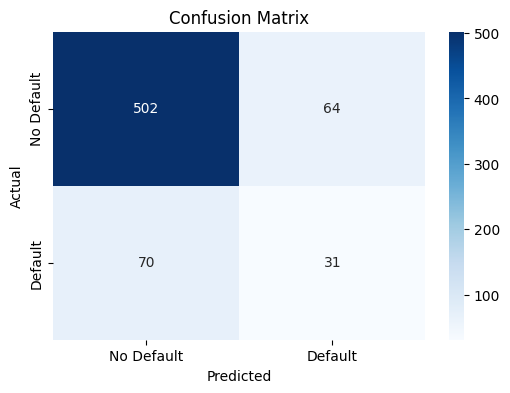

In [42]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, test_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


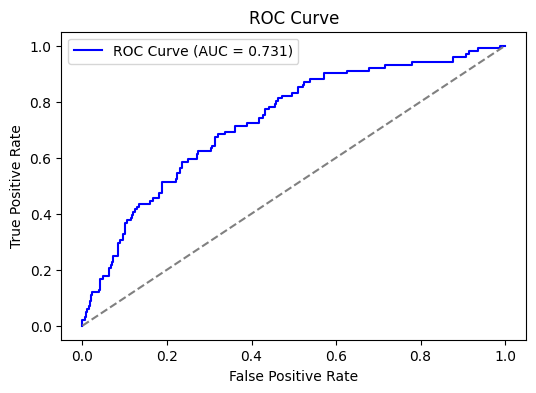

ROC AUC Score: 0.731


In [44]:
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (1)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)  # Compute AUC (Area Under the Curve)

# Plot ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
print(f"ROC AUC Score: {roc_auc:.3f}")


This plot shows a ROC (Receiver Operating Characteristic) curve, which evaluates the performance of a binary classifier—in this case, for predicting customer churn.

The x-axis represents the False Positive Rate (FPR) — the proportion of non-churning customers incorrectly classified as churners.

The y-axis represents the True Positive Rate (TPR) — the proportion of actual churners correctly identified.

The blue curve illustrates how well the classifier distinguishes between churners and non-churners at various threshold levels.
The dashed diagonal line represents the performance of a random classifier (AUC = 0.5).

The Area Under the Curve (AUC), calculated here as {roc_auc:.3f = 0.731}, quantifies the overall ability of the model to discriminate between the two classes.
A value closer to 1.0 indicates a highly effective model, while 0.5 suggests no discriminative power.

In this case, an AUC of {roc_auc:.3f} suggests that the model can reliably distinguish between customers who are likely to churn and those who are not.

### Training a random forest model

In [45]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Accuracy: 0.8935532233883059
Precision: 1.0
Recall: 0.297029702970297
F1-Score: 0.4580152671755725


Confusion Matrix:
[[566   0]
 [ 71  30]]


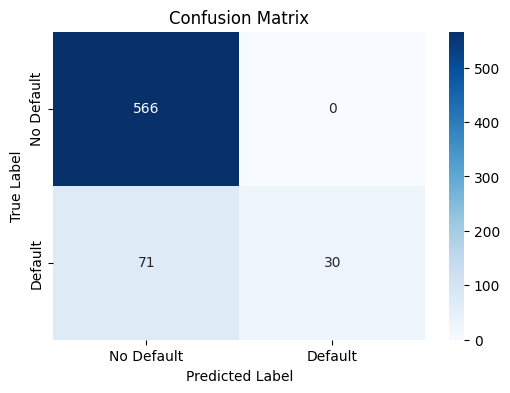

In [46]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Visualize confusion matrix with a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


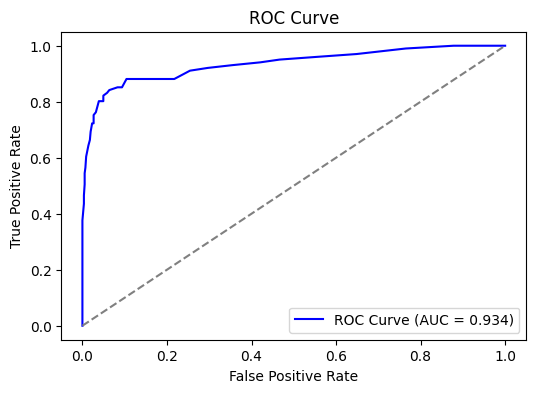

ROC AUC Score: 0.934


In [49]:
# Get predicted probabilities for the positive class (1)
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
print(f"ROC AUC Score: {roc_auc:.3f}")

This ROC (Receiver Operating Characteristic) curve visually represents the classification performance of the churn prediction model. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels used to classify customers as likely to churn (1) or not (0).

The blue curve shows the model’s ability to distinguish between churners and non-churners across different thresholds.

The dashed diagonal line represents random guessing, with an AUC (Area Under the Curve) of 0.5 — the baseline for a non-informative classifier.

The closer the blue curve is to the top-left corner, the better the model is at making correct classifications.
In this case, the AUC = {roc_auc:.3f = 0.934}, indicating the model has strong discriminative ability and performs significantly better than random at predicting churn.

### Adjusting Decision threshold

In [50]:
y_probs = model.predict_proba(X_test)[:, 1]  
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Set a lower threshold (e.g., 0.3 instead of 0.5)
y_pred_adjusted = (y_probs >= 0.3).astype(int)

model = RandomForestClassifier(class_weight={0: 1, 1: 3}, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 3}, random_state=42)

In this case, a Random Forest classifier is trained with a custom class weight ({0:1, 1:3}), emphasizing the importance of correctly identifying churning customers (positive class). This helps the model handle class imbalance by penalizing misclassification of churners more heavily.

After training, the predicted probabilities for the positive class are used to evaluate the trade-off between precision and recall using the Precision-Recall curve.

By lowering the decision threshold from the default 0.5 to 0.3, the model becomes more sensitive to predicting churn:

This increases recall, meaning more actual churners are correctly identified (fewer false negatives).

It may reduce precision, meaning more non-churners might be misclassified as churners (more false positives).

This threshold adjustment is especially useful in scenarios where missing a churner is more costly than mistakenly flagging a loyal customer, such as in customer retention strategies.

  
  #### Apply  Oversampling (SMOTE) to generate synthetic samples for the minority class.

In [51]:
# SMOTE Recall testing

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train model on resampled data
model_smote = RandomForestClassifier(random_state=42)
model_smote.fit(X_resampled, y_resampled)

# Evaluate recall on test set
y_pred_smote = model_smote.predict(X_test)
print("Recall after SMOTE:", recall_score(y_test, y_pred_smote))

Recall after SMOTE: 0.4752475247524752


In [52]:
# Baseline Recall testing

y_pred = model.predict(X_test)
print("Baseline Recall:", recall_score(y_test, y_pred))

Baseline Recall: 0.18811881188118812


In [53]:
#Threshold tuning Recall testing

y_probs = model.predict_proba(X_test)[:, 1] 
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Choose a lower threshold (e.g., 0.3 instead of 0.5)
optimal_threshold = 0.3
y_pred_adjusted = (y_probs >= optimal_threshold).astype(int)

print("Recall after Threshold Tuning:", recall_score(y_test, y_pred_adjusted))


Recall after Threshold Tuning: 0.6534653465346535


The threshold tuning method proves more effective in this churn prediction task, as it optimizes recall, reducing false negatives and ensuring the model more reliably identifies customers likely to churn. By lowering the classification threshold from 0.5 to 0.3, the model becomes more sensitive to potential churners, improving its ability to catch at-risk customers better than the baseline and even the SMOTE-resampled approach.